<a href="https://colab.research.google.com/github/ameyadalvi84/Sign_Language_Dataset/blob/master/Sign_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import matplotlib.pyplot as plt

%matplotlib inline


In [27]:
train_data = pd.read_csv("/tmp/sign_mnist_train.csv",delimiter=',')
test_data = pd.read_csv("/tmp/sign_mnist_test.csv",delimiter=',')
#train_data.head(5)

In [28]:
trainlabels = train_data['label']
trainimages = train_data.drop('label',axis=1)
testimages = test_data.drop('label',axis=1)
testlabels = test_data['label']  
#trainimages.head(5)

In [29]:
print(len(trainlabels))
print(len(trainimages))
print(len(testlabels))
print(len(testimages))

27455
27455
7172
7172


In [30]:
train_images = np.array(trainimages).reshape((len(trainimages),28,28))
train_labels = np.array(trainlabels).reshape((len(trainlabels),1))
test_images = np.array(testimages).reshape((len(testimages),28,28))
test_labels = np.array(testlabels).reshape((len(testlabels),1))

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#train_images[1]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


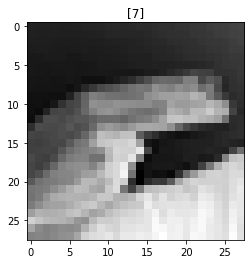

In [31]:
import random
random.seed(1234)
indx = np.random.randint(0,len(trainimages)+1)
plt.imshow(train_images[indx],cmap = plt.cm.binary)
plt.title(train_labels[indx])
plt.show()

In [35]:
train_label_cat = tf.keras.utils.to_categorical(train_labels)
test_label_cat = tf.keras.utils.to_categorical(test_labels)
#train_images = np.expand_dims(train_images,axis=3)
#test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_labels.shape)
val_images = train_images[:2000]
val_labels = train_label_cat[:2000]
patrial_train_images = train_images[2000:]
partial_train_labels = train_label_cat[2000:]

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(7172, 1)
(27455, 1)


In [45]:
#tf.keras.optimizers.SGD(
#    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs
#)

learning_rate = 0.1
lr_drop = 3
lr_decay = 1e-6
def lr_schdl(epoch):
  return learning_rate * (0.5 ** (epoch // lr_drop))

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_schdl)

model = models.Sequential([
                           layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)),
                           layers.BatchNormalization(),
                           layers.MaxPooling2D(),
                           layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                           layers.BatchNormalization(),
                           
                           layers.MaxPooling2D(),
                           layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                           layers.BatchNormalization(),
                           
                           layers.MaxPooling2D(),
                           layers.Conv2D(256,(3,3),padding='same',activation='relu'),
                           layers.BatchNormalization(),
                           
                           layers.MaxPooling2D(),
                           layers.Flatten(),
                           layers.Dense(512,activation='relu'),
                           layers.Dense(25,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [46]:
history = model.fit(patrial_train_images,
                    partial_train_labels,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = (val_images,val_labels),
                    #validation_steps = 32,
                    callbacks = [reduce_lr])

Epoch 1/20
796/796 [==============================] - 4s 5ms/step - loss: 1.5792 - accuracy: 0.4700 - val_loss: 0.6832 - val_accuracy: 0.8430 - lr: 0.1000
Epoch 2/20
796/796 [==============================] - 3s 4ms/step - loss: 0.1881 - accuracy: 0.9289 - val_loss: 0.2472 - val_accuracy: 0.9100 - lr: 0.1000
Epoch 3/20
796/796 [==============================] - 3s 4ms/step - loss: 0.1426 - accuracy: 0.9526 - val_loss: 0.1629 - val_accuracy: 0.9390 - lr: 0.1000
Epoch 4/20
796/796 [==============================] - 3s 4ms/step - loss: 0.0498 - accuracy: 0.9796 - val_loss: 0.0541 - val_accuracy: 0.9780 - lr: 0.0500
Epoch 5/20
796/796 [==============================] - 3s 4ms/step - loss: 0.0397 - accuracy: 0.9900 - val_loss: 0.0368 - val_accuracy: 0.9955 - lr: 0.0500
Epoch 6/20
796/796 [==============================] - 3s 4ms/step - loss: 0.0331 - accuracy: 0.9968 - val_loss: 0.0356 - val_accuracy: 0.9965 - lr: 0.0500
Epoch 7/20
796/796 [==============================] - 3s 4ms/step - lo

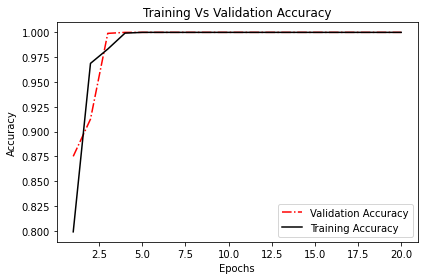

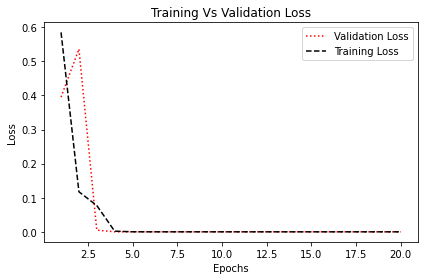

In [40]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['accuracy']

epoch_num = range(1,len(val_acc)+1)

plt.plot(epoch_num,val_acc,'r-.',label="Validation Accuracy")
plt.plot(epoch_num,acc,'k-',label='Training Accuracy')
plt.title("Training Vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.figure()

plt.plot(epoch_num,val_loss,'r:',label="Validation Loss")
plt.plot(epoch_num,loss,'k--',label='Training Loss')
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()

plt.show()

In [41]:
result = model.evaluate(test_images, test_label_cat)
result

225/225 [==============================] - 1s 4ms/step - loss: 0.1595 - accuracy: 0.9746


[0.15951906144618988, 0.9746235609054565]

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred = model.predict(test_images)
y_pred = np.argmax(Y_pred, axis=1)
print("Confusion Matrix")
print(confusion_matrix(test_labels,y_pred))

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 432   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 327  20   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20 416   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 286   0   0   0   0   0   0   0   0   1
    1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 

In [44]:
print("Classification Report")
print(classification_report(test_labels,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      1.00      1.00       432
           2       0.98      1.00      0.99       310
           3       1.00      1.00      1.00       245
           4       0.96      1.00      0.98       498
           5       1.00      1.00      1.00       247
           6       0.94      0.94      0.94       348
           7       0.95      0.95      0.95       436
           8       1.00      0.99      1.00       288
           9       0.00      0.00      0.00         0
          10       0.98      0.98      0.98       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       0.99      0.98      0.98       291
          14       1.00      0.97      0.99       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
